<a href="https://colab.research.google.com/github/catastropiyush/diffractsim/blob/main/diffract_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffractsim

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 2.6 MB/s eta 0:00:00
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12066 sha256=e4daf46d0f7e885e20d247e228fb59f535f7ca7c775ae142e9c0771fcf0ce219
  Stored in directory: /root/.cache/pip/wheels/8d/bb/b2/5353b966ac6f3c5e1000629a9a5f6aed41794487f551e32efc
Successfully built progressbar


In [5]:
!git clone https://github.com/catastropiyush/diffractsim.git

Cloning into 'diffractsim'...
remote: Enumerating objects: 920, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 920 (delta 26), reused 23 (delta 22), pack-reused 879 (from 2)
Receiving objects: 100% (920/920), 44.47 MiB | 33.17 MiB/s, done.
Resolving deltas: 100% (592/592), done.


Took 150.10994219779968

 Effective focal distance of the axicon: 47.2 cm


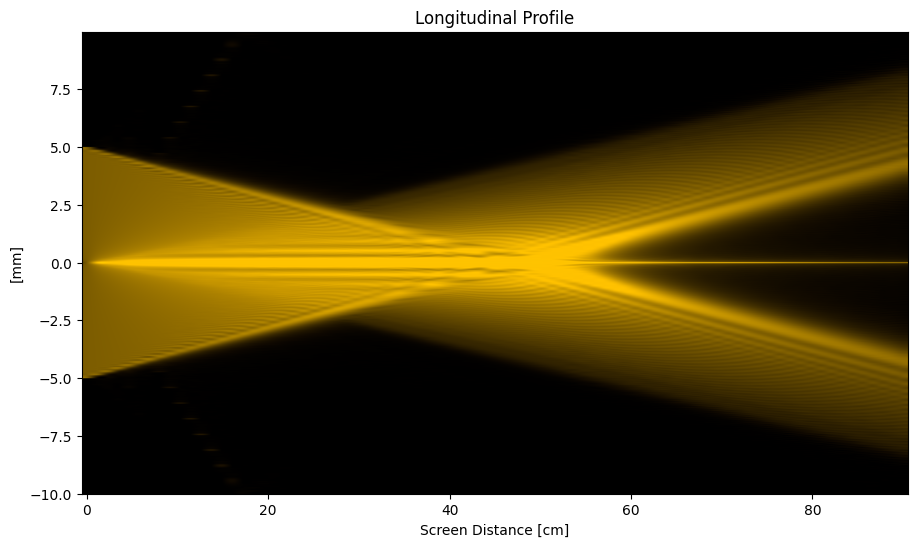

In [7]:
import diffractsim
diffractsim.set_backend("CPU") #Change the string to "CUDA" to use GPU acceleration
# Note: this example is highly recommendeded to run with CUDA

from diffractsim import MonochromaticField, nm, mm, cm, Axicon, bd


F = MonochromaticField(
    wavelength = 578 * nm, extent_x=20. * mm, extent_y=20. * mm, Nx=2048, Ny=2048, intensity =0.005
)

"""
The axicon that creates a beam with an approximate Bessel function profile.
"""

F.add(Axicon(period = 0.06*mm, radius = 5*mm))


end_distance = 90 *cm
steps = 80
longitudinal_profile_rgb, longitudinal_profile_E, extent = F.get_longitudinal_profile( start_distance = 0*cm , end_distance = end_distance , steps = steps)

#measure the position of the intensity maximum
longitudinal_profile_E = longitudinal_profile_E[:, 1024]
index = bd.argmax(bd.abs(longitudinal_profile_E))
print('\n Effective focal distance of the axicon: {} cm'.format("%.1f"  % (index * end_distance / steps / cm)))

#plot colors
F.plot_longitudinal_profile_colors(longitudinal_profile_rgb = longitudinal_profile_rgb, extent = extent)

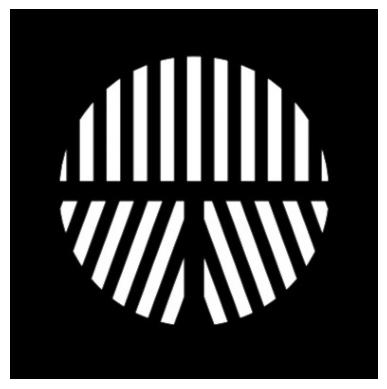

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('/content/diffractsim/examples/apertures/bahtinov_mask.jpg')
plt.imshow(image)
plt.axis('off') # Hide axes
plt.show()

Computation Took 31.941471099853516


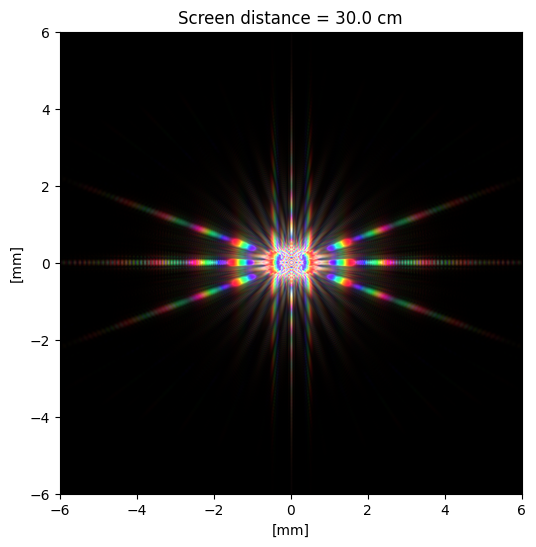

In [9]:
from diffractsim import PolychromaticField, Lens, ApertureFromImage, cf, nm, mm, cm

F = PolychromaticField(
    spectrum = 4*cf.illuminant_d65,
    extent_x=15. * mm, extent_y=15. * mm,
    Nx=1500, Ny=1500
)

F.add(ApertureFromImage("/content/diffractsim/examples/apertures/bahtinov_mask.jpg", image_size=(5. * mm, 5 * mm), simulation = F))

F.add(Lens(f = 30*cm))
F.propagate(z=30*cm)

rgb =F.get_colors()
F.plot_colors(rgb, xlim=[-6* mm, 6* mm], ylim=[-6* mm, 6* mm])

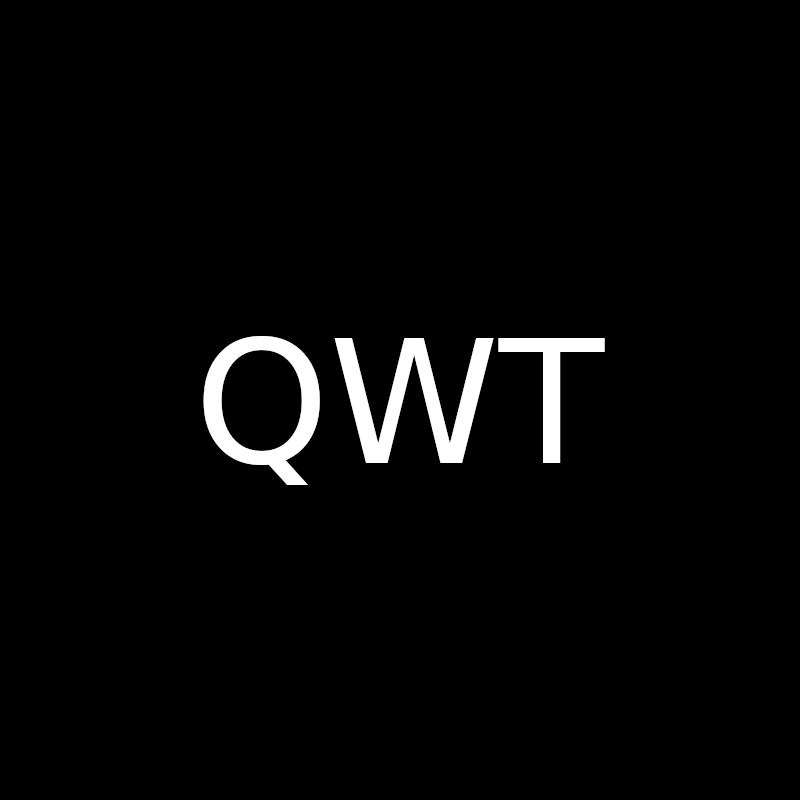

In [13]:
from IPython.display import Image
display(Image('/content/diffractsim/examples/apertures/QWT.png',width=150, height=150))

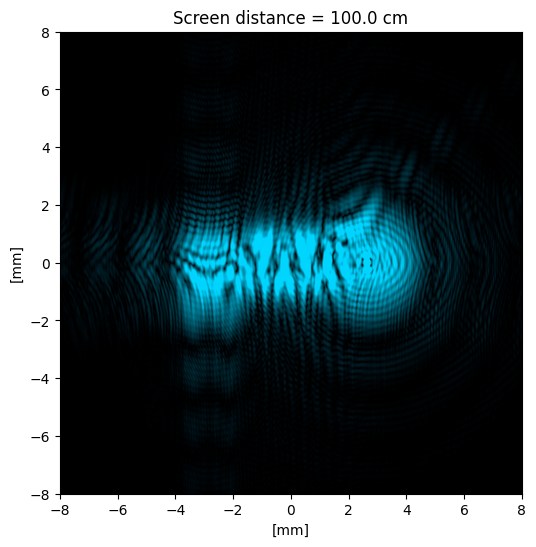

In [11]:
from diffractsim import MonochromaticField, ApertureFromImage, Lens, nm, mm, cm

F = MonochromaticField(
    wavelength=488 * nm, extent_x=27. * mm, extent_y=27. * mm, Nx=2000, Ny=2000,intensity = 0.2
)

F.add(ApertureFromImage("/content/diffractsim/examples/apertures/QWT.png", image_size=(15 * mm, 15 * mm), simulation = F))

F.add(Lens(f = 50*cm))
F.propagate(100*cm)

rgb = F.get_colors()
F.plot_colors(rgb, xlim=[-8*mm,8*mm], ylim=[-8*mm,8*mm])

In [ ]:
from diffractsim import MonochromaticField, nm, mm, cm, BinaryGrating, Lens

F = MonochromaticField(
    wavelength = 632.8 * nm, extent_x=3. * mm, extent_y=3. * mm, Nx=2048, Ny=2048, intensity =2.
)


F.add(BinaryGrating(width = 0.5*mm, height = 0.5*mm, period = 0.05 *mm))


# plot the grating
I = F.get_intensity()
F.plot_intensity(I, grid = True, units = mm)

F.add(Lens(f = 30*cm))
F.zoom_propagate(30*cm, x_interval = [-8*mm, 8*mm], y_interval = [-8*mm,8*mm])

# plot the diffraction pattern
I = F.get_intensity()
F.plot_intensity(I, square_root = True, units = mm, grid = True, figsize = (14,5), slice_y_pos = 0*mm)

Took 2.9261698722839355


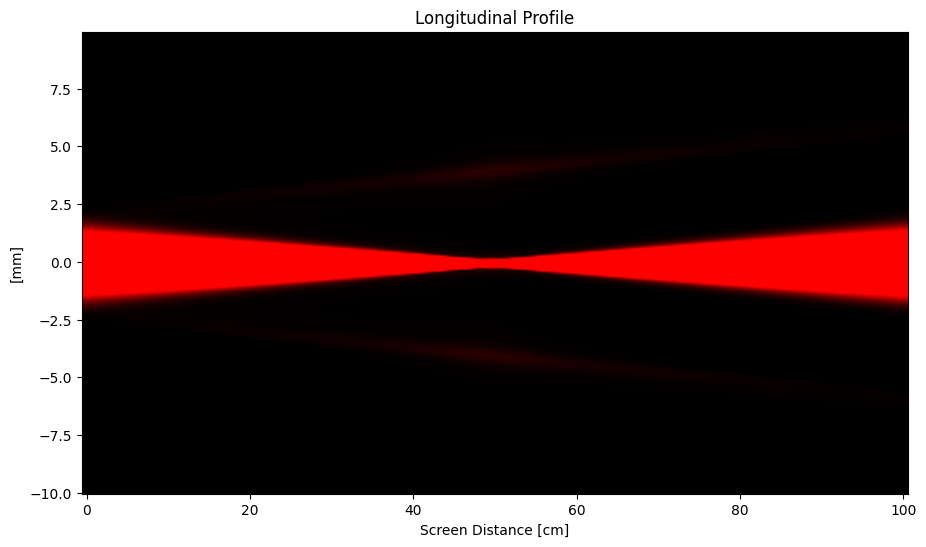

(80, 256, 3)


In [2]:
import diffractsim

diffractsim.set_backend("CPU") #Change the string to "CUDA" to use GPU acceleration
# Note: this example is highly recommendeded to run with CUDA

from diffractsim import MonochromaticField, Lens, nm, mm, cm, GaussianBeam

F = MonochromaticField(
    wavelength=630 * nm, extent_x=20. * mm, extent_y=20. * mm, Nx=256, Ny=256,intensity = 1
)
F.add(GaussianBeam(1*mm))
F.add(
    Lens(
        diffractsim.bd.Inf,
        # equivalent OPD to a 50cm lens: -1/(2*f) r^2
        aberration=lambda x,y: -1/(2*50*cm) * (x**2+y**2)
    )
)

longitudinal_profile_rgb, longitudinal_profile_E, extent = F.get_longitudinal_profile( start_distance = 0*cm , end_distance = 100 *cm , steps = 80)
F.plot_longitudinal_profile_colors(longitudinal_profile_rgb = longitudinal_profile_rgb, extent = extent)
print(longitudinal_profile_rgb.shape)


Computation Took 34.645955085754395


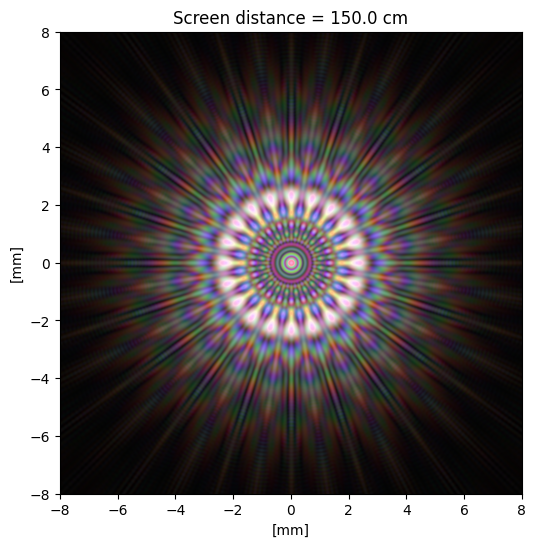

In [6]:
import diffractsim
diffractsim.set_backend("CPU") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import PolychromaticField,ApertureFromImage, cf, mm, cm

F = PolychromaticField(
    spectrum=1.5 * cf.illuminant_d65,
    extent_x=25.0 * mm,
    extent_y=25.0 * mm,
    Nx=1500,
    Ny=1500,
    spectrum_size = 200, spectrum_divisions = 40  # increase these values to improve color resolution
)

F.add(ApertureFromImage("/content/diffractsim/examples/apertures/rings.jpg", image_size = (12.0 * mm,12.0 * mm), simulation = F))


F.propagate(z=150*cm)
rgb = F.get_colors()
F.plot_colors(rgb, xlim=[-8*mm, 8*mm], ylim=[-8*mm, 8*mm])